First 5 rows of the dataset:
   Temperature  Revenue
0         24.6      535
1         26.1      626
2         27.8      661
3         20.6      488
4         11.6      317

Missing values in each column:
Temperature    0
Revenue        0
dtype: int64

Summary statistics:
       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000


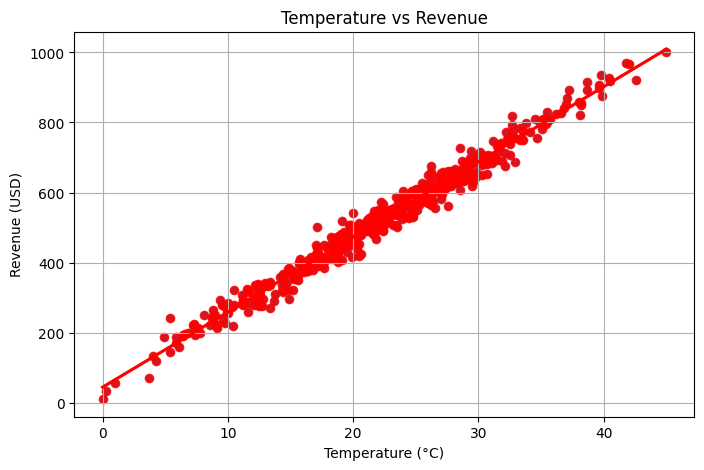

RMSE: 25.543958747446354
MAE: 19.195652579103704
R2 Score: 0.9771509516333023

Model Coefficients:
Intercept: 46.18
Slope (Temperature's effect on Revenue): 21.38


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv("/content/Ice Cream.csv")

print("First 5 rows of the dataset:")
print(data.head())

print("\nMissing values in each column:")
print(data.isnull().sum())

print("\nSummary statistics:")
print(data.describe())

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temperature', y='Revenue', data=data)
sns.regplot(x='Temperature', y='Revenue', data=data, ci=None, color='red')
plt.title("Temperature vs Revenue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Revenue (USD)")
plt.grid(True)
plt.show()

X = data[['Temperature']]
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope (Temperature's effect on Revenue): {model.coef_[0]:.2f}")
